**Modelling**

Thamu Mnyulwa

Updated:23/11/21

We will discuss:

0. Data Analysis and Feature Engineering
1. **Feature Selection**
2. **Model Training**
3. **Obtaining Predictions / Scoring**

In this notebook we take the work from our data analysis and the pipeline that has been prepared to try and do some variable selection. As previously stated, this dataset's response is unbalanced. To address this, we examine how this could be remedied by experimenting with various resampling algorithms, but because of time constraints, we will confine ourselves to a theoretical explanation that can be easily done with a few web searches. 


Let's begin by outlining a few of the reasons why this is essential. 

### Why is this important? 

Predicting whether a customer will take up a savings product is critical to a bank's profitability.
We can consider the usage from two perspectives: first, determining which factors motivate customers to purchase products (inference) in order to plan more investment in client-pull factors (inference), and second, forecasting which unseen clients are likely to purchase services  (prediction).

### What is the objective of the machine learning model?

As previously mentioned this is a classification problem which is a subset of supervised learning and it can be seen as both a imbalanced data problem and a missing data problem to a lesser degree.

The purpose of this model is to develop an easily interpretable model for prospective regulatory purposes, including but not limited to audits by financial regulators. 

We will evaluate model performance with the:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).

In [1]:
#!pip install imbalanced-learn # issues with this package and an SHH error

# Preable

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imblearn
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from loguru import logger
from imblearn.combine import SMOTETomek
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
#from pipeline import model_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import f1_score
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Pipeline thus far

In [61]:
# Let's begin by pulling the data from our git end-point and providing the pipeline so far from the 
# dataanalysis and feauture engineering notebook (0_dataanalysis_bankmarketingdata.ipynb)

#!/usr/bin/python
# -*- coding: utf-8 -*-
# Final decision on encoding and transforming data

RANDOM_SEED = 100

# Load data
# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)

DATA_URL = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv'  # DATA_URL

raw_dataset = pd.read_csv(DATA_URL, na_values='?',sep=';', skipinitialspace=True, index_col=None)

# copy raw data

data = raw_dataset.copy()

# DF_COLUMNS    
column_names = [ 
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y',
    ]
cat_columns = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    ]
numeric_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]
response = ['y']




# Copy raw data into data variable for analysis

data = raw_dataset.copy()

# variable types

ONE_HOT_VARS = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    ]

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

STANDARDIZE_VARS = [
    'campaign',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

# variable types





LOG_NORM_VARS = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']

## =========================================== Renaming all variables ============================ ##

# rename variables for integer encoding

data['month'] = data['month'].map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'unknown': 0,
    np.nan: 0,
    })

data['day_of_week'] = data['day_of_week'].map({
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7,
    'unknown': 0,
    np.nan: 0,
    })

# rename variables for masking

data['y'] = data['y'].map({'yes': 1, 'no': 0})

data['job'] = data['job'].map({
    'housemaid': 1,
    'services': 2,
    'admin.': 3,
    'blue-collar': 4,
    'technician': 5,
    'retired': 6,
    'management': 7,
    'unemployed': 8,
    'self-employed': 9,
    'unknown': 0,
    'entrepreneur': 10,
    'student': 11,
    })

data['marital'] = data['marital'].map({
    'married': 1,
    'single': 2,
    'divorced': 3,
    'unknown': 0,
    np.nan: 0,
    })

data['education'] = data['education'].map({
    'university.degree': 1,
    'basic.9y': 2,
    'high.school': 3,
    'professional.course': 4,
    'basic.6y': 5,
    'basic.4y': 6,
    'unknown': 7,
    'illiterate': 8,
    'unknown': 0,
    np.nan: 0,
    })

data['default'] = data['default'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['housing'] = data['housing'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['loan'] = data['loan'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['contact'] = data['contact'].map({
    'telephone': 1,
    'cellular': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['poutcome'] = data['poutcome'].map({
    'nonexistent': 1,
    'failure': 2,
    'success': 3,
    np.nan: 0,
    })

## =============================================================================================== ##

# Outer loop 0 to 9, since train.colums has 9 col

for i in range(len(data.columns)):    
    if data.columns[i] in str(cat_columns):
        data[data.columns[i]] = data[data.columns[i]].astype('object')
    
    if data.columns[i] in str(numeric_columns):
        data[data.columns[i]] = data[data.columns[i]].astype('float32')
        
# ================================= Split the data - train, validation and test ===============================#

(train_set, test_set) = train_test_split(data, test_size=0.30,
        random_state=RANDOM_SEED)  # RANDOM_SEED = 100

X_train = train_set.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)

y_train = train_set['y']
y_test = test_set['y']

logger.info(f"Training shape: {train_set.shape}")
logger.info(f"Test shape: {test_set.shape}")
logger.info(f"Data shape: {data.shape}")

# ======================================  Integer incode (ordianal categorical variable) =================================#

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

# Instead of using an encoder, we can just do this with a simple for loop

for i in range(len(X_test.columns)):
    if X_test.columns[i] in str(INTEGER_ENCODE_VARS):
        X_test[X_test.columns[i]] = \
            X_test[X_test.columns[i]].astype('int64')
for i in range(len(X_train.columns)):
    if X_train.columns[i] in str(INTEGER_ENCODE_VARS):
        X_train[X_train.columns[i]] = \
            X_train[X_train.columns[i]].astype('int64')
            

# ======================================  One-hot incode (categorical unordered) =================================#

NUMERIC_COLUMNS = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

# reset index or else going to get Nan
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# create scaler

scaler = StandardScaler()

#  fit  the scaler to the train set

scaler.fit(X_train[NUMERIC_COLUMNS])

X_train[NUMERIC_COLUMNS] = pd.DataFrame(scaler.transform(X_train[NUMERIC_COLUMNS]),
                       columns=NUMERIC_COLUMNS)

X_test[NUMERIC_COLUMNS] = pd.DataFrame(scaler.transform(X_test[NUMERIC_COLUMNS]),
                      columns=NUMERIC_COLUMNS)
                
# ======================================  One-hot incode (categorical unordered) ================== #

# Chose not to one hot-encode at this point. reason being that there would be too many columns,
# would rather drop some columns in variable selection notebook and then come back to do this.

# ======================================  One-hot incode (categorical unordered) ================== #


logger.info(f'done')

2021-11-23 07:43:59.585 | INFO     | __main__:<module>:240 - Training shape: (28831, 21)
2021-11-23 07:43:59.598 | INFO     | __main__:<module>:241 - Test shape: (12357, 21)
2021-11-23 07:43:59.599 | INFO     | __main__:<module>:242 - Data shape: (41188, 21)
2021-11-23 07:43:59.673 | INFO     | __main__:<module>:301 - done


In [62]:
# Check the column names and datatypes
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12357 entries, 0 to 12356
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             12357 non-null  float32
 1   job             12357 non-null  object 
 2   marital         12357 non-null  object 
 3   education       12357 non-null  object 
 4   default         12357 non-null  object 
 5   housing         12357 non-null  object 
 6   loan            12357 non-null  object 
 7   contact         12357 non-null  object 
 8   month           12357 non-null  int64  
 9   day_of_week     12357 non-null  int64  
 10  duration        12357 non-null  float32
 11  campaign        12357 non-null  float32
 12  pdays           12357 non-null  float32
 13  previous        12357 non-null  float32
 14  poutcome        12357 non-null  object 
 15  emp.var.rate    12357 non-null  float32
 16  cons.price.idx  12357 non-null  float32
 17  cons.conf.idx   12357 non-null 

In [63]:
# Log dimensions

logger.info("train rows:      " +str(X_train.shape[0]))
logger.info("train columns:   " +str(X_train.shape[1]))

logger.info("train rows:      "+str(X_test.shape[0]))
logger.info("train columns:   "+str(X_test.shape[1]))

logger.info("test rows:       "+str(y_test.shape[0]))
logger.info("test columns:    "+str(y_train.shape[0]))

2021-11-23 07:44:12.289 | INFO     | __main__:<module>:3 - train rows:      28831
2021-11-23 07:44:12.290 | INFO     | __main__:<module>:4 - train columns:   20
2021-11-23 07:44:12.291 | INFO     | __main__:<module>:6 - train rows:      12357
2021-11-23 07:44:12.292 | INFO     | __main__:<module>:7 - train columns:   20
2021-11-23 07:44:12.292 | INFO     | __main__:<module>:9 - test rows:       12357
2021-11-23 07:44:12.293 | INFO     | __main__:<module>:10 - test columns:    28831


# Further analysis

Let's take a look at the numeric values after the transformation just to ensure that the variance is reasonable and scales have been dealt with.

In [9]:
X_train.shape

(28831, 20)

In [10]:
train = X_train.join(y_train).reset_index(drop=True) # reset index, error was occuring
train = train[column_names]

test = X_test.join(y_test).reset_index(drop=True) # reset index, error was occuring
test = test[column_names]

train.shape

(28831, 21)

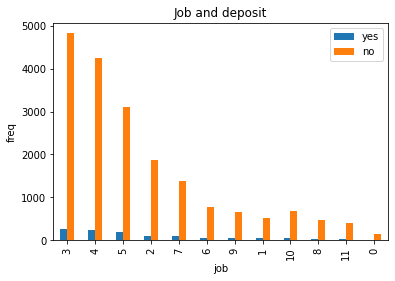

In [11]:
# remerge data for stratified sampling to deal with imbalance

test = pd.concat([y_test, X_test], axis=1).reset_index(drop=True) # reset index, error was occuring

#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = train[train['y'] == 1]['job'].value_counts()
j_df['no'] = train[train['y'] == 0]['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

plt.xlabel("job")
plt.ylabel("freq");

In [24]:
# Copy in case of mistake
train0 = train.copy()
train0.shape

(28831, 21)

In [26]:
# Drop certain variables because of high cardinality 
#drop irrelevant columns 


train.drop(columns = 'pdays', axis=1, inplace=True)
train.drop(columns = 'job', axis=1, inplace=True)

train.shape

(28831, 19)

# Resampling for imbalance

At this stage, in order to deal with the imbalanced data, we have opted to use stratified sampling.
We are attempting to preserve part of the data's structure while providing a balanced response.
Regrettably, in the world of financial data and fraud, the problem of imbalanced data is pervasive. 

If we have time at the end, after developing a plausible heuristic model, we will return here and fine-tune this to determine the optimal approach to resample to address the imbalance, but for now, we have selected stratified sampling because it is reasonable. 

2021-11-23 07:44:20.359 | INFO     | __main__:<module>:10 - p:       0.113003366


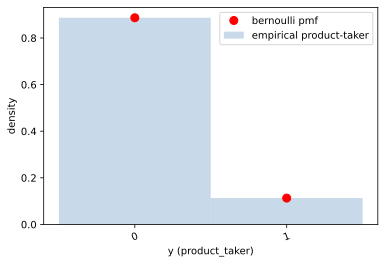

In [64]:
%config InlineBackend.figure_format = 'svg'# Magic command for vectorised figures

# histogran to evaluate target distribution, the target distribution lookes imbalanced

# theoretical distribution
meanvalue = np.mean( y_train)
p = meanvalue


logger.info("p:       "+str(p))
plt.plot((0,1),
        stats.bernoulli.pmf((0,1), p),
        'ro',
        ms=8,
        label='bernoulli pmf')

# empirical
plt.hist(y_train,density=True, bins=np.linspace(-0.5,1.5,3),
        alpha=0.3,
        color='steelblue',
        edgecolor='none',
        label='empirical product-taker')

plt.xticks([0, 1], ['0', '1'],

       rotation=20)  # Set text labels and properties.
plt.ylabel('density')
plt.xlabel('y (product_taker)')
plt.legend(loc=0)
plt.show()


In [66]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.863168,3,1,1,2,1,2,1,5,4,-0.599620,0.511186,0.196609,-0.350400,1,0.649769,0.723316,0.891841,0.715460,0.333623
1,1.052665,5,2,2,2,1,2,1,11,5,-0.157795,0.152623,0.196609,-0.350400,1,-0.114601,-0.650842,-0.319726,0.231940,0.400054
2,-0.096835,3,2,1,2,2,2,2,7,1,0.280220,0.152623,0.196609,-0.350400,1,0.840862,0.591779,-0.471172,0.773091,0.847103
3,2.681123,6,3,3,2,1,2,2,10,1,-0.492973,0.511186,0.196609,3.679266,2,-0.751576,1.773820,-1.942361,-1.509077,-2.813683
4,-0.288418,5,1,3,2,1,2,1,6,2,0.028837,0.152623,0.196609,-0.350400,1,0.840862,1.538447,-0.276455,0.717766,0.847103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,0.382123,0,1,5,2,2,2,2,7,2,-0.230163,-0.205939,0.196609,-0.350400,1,0.840862,0.591779,-0.471172,0.773667,0.847103
28827,0.190540,4,1,2,0,2,2,1,5,1,-0.195884,-0.564502,0.196609,-0.350400,1,0.649769,0.723316,0.891841,0.713731,0.333623
28828,-0.096835,8,1,6,2,2,2,1,6,1,-0.214928,-0.564502,0.196609,-0.350400,1,0.840862,1.538447,-0.276455,0.765599,0.847103
28829,-1.725293,1,2,3,2,1,1,2,7,1,1.933254,3.379688,0.196609,-0.350400,1,0.840862,0.591779,-0.471172,0.774243,0.847103


In [ ]:
#!pip3 install imblearn

2021-11-23 07:45:32.645 | INFO     | __main__:<module>:10 - train X rows:      51046
2021-11-23 07:45:32.652 | INFO     | __main__:<module>:11 - train X columns:   20
2021-11-23 07:45:32.653 | INFO     | __main__:<module>:13 - train y rows:      51046


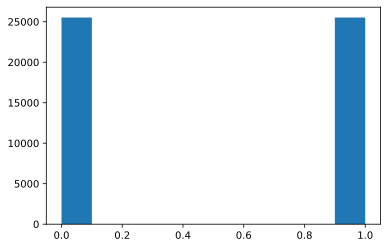

In [67]:
from imblearn.combine import SMOTETomek


# 'SMOTE + Tomek links'
smt = SMOTETomek()

X_smt, y_smt = smt.fit_resample(X_train, y_train) # random_state =RANDOM_SEED

plt.hist(y_smt)
logger.info("train X rows:      " +str(X_smt.shape[0]))
logger.info("train X columns:   " +str(X_smt.shape[1])) 

logger.info("train y rows:      " +str(X_smt.shape[0]));


term_deposits = X_smt

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes


# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'y'
X = term_deposits



2021-11-22 08:34:09.718 | INFO     | __main__:<module>:6 - test rows:       0.5


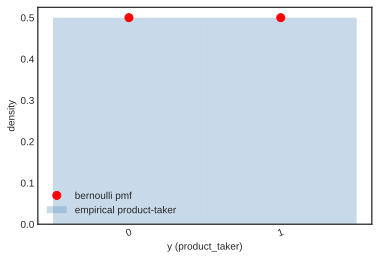

In [88]:
# theoretical distribution
meanvalue = np.mean( y_smt)
p = meanvalue


logger.info("test rows:       "+str(p))
logger.info("test rows:       "+str(p))

plt.plot((0,1),
        stats.bernoulli.pmf((0,1), p),
        'ro',
        ms=8,
        label='bernoulli pmf')

# empirical
plt.hist(y_smt,density=True, bins=np.linspace(-0.5,1.5,3),
        alpha=0.3,
        color='steelblue',
        edgecolor='none',
        label='empirical product-taker')

plt.xticks([0, 1], ['0', '1'],

       rotation=20)  # Set text labels and properties.
plt.ylabel('density')
plt.xlabel('y (product_taker)')
plt.legend(loc=0)
plt.show()


At this point we could compare different methods of dealing with the imbalanced data and evaluate them but due to the time constraints, we keep moving forward.

A discussion of this would be provided in a section on resampling strategies for imbalanced data.

# Variable importance

In [68]:


term_deposits = X_smt

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes


# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'y'
X = term_deposits


label= y_smt



# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01)

tree = tree.fit(X, y_smt)

importances = tree.feature_importances_
feature_names = term_deposits.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.584747)
2. feature 19 (0.240798)
3. feature 8 (0.083593)
4. feature 17 (0.036177)
5. feature 18 (0.012594)
6. feature 16 (0.011917)
7. feature 5 (0.007652)
8. feature 15 (0.005423)
9. feature 11 (0.004830)
10. feature 7 (0.004521)
11. feature 14 (0.002302)
12. feature 3 (0.001976)
13. feature 2 (0.001832)
14. feature 9 (0.001577)
15. feature 12 (0.000057)
16. feature 0 (0.000005)
17. feature 6 (0.000000)
18. feature 4 (0.000000)
19. feature 13 (0.000000)
20. feature 1 (0.000000)


In [81]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

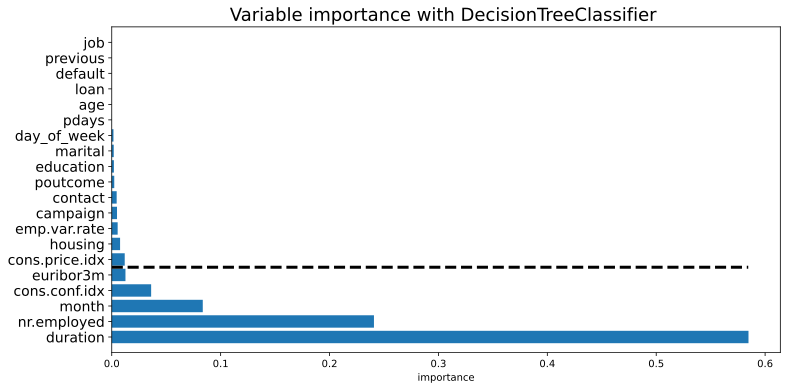

In [69]:
# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Variable importance with DecisionTreeClassifier ", fontsize=18)
    plt.barh(range(len(indices)), importances[indices],  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=4.5, xmin=0, xmax=0.952, color='k', linewidth=3, linestyle='--')
    
feature_importance_graph(indices, importances, feature_names)
plt.xlabel('importance')
plt.show()

In [70]:
variable_importance = [
    'month',
    'duration',
    'cons.price.idx',
    'cons.conf.idx',
    'nr.employed'
    ]

# Final pipe-line after variable selection

In [71]:
# Let's begin by pulling the data from our git end-point and providing the pipeline so far from the 
# dataanalysis and feauture engineering notebook (0_dataanalysis_bankmarketingdata.ipynb)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imblearn
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from loguru import logger
from imblearn.combine import SMOTETomek

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from pipeline import model_pipeline
from sklearn.metrics import mean_squared_error, r2_score


#!/usr/bin/python
# -*- coding: utf-8 -*-
# Final decision on encoding and transforming data

RANDOM_SEED = 100

# Load data
# Import raw dataset from URL (same as data provided, just put in a git repository for ease of)

DATA_URL = 'https://raw.githubusercontent.com/ThamuMnyulwa/bankMarketing/main/bank-additional-full.csv'  # DATA_URL

raw_dataset = pd.read_csv(DATA_URL, na_values='?',sep=';', skipinitialspace=True, index_col=None)

# copy raw data

data = raw_dataset.copy()

# DF_COLUMNS    
column_names = [ 
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y',
    ]
cat_columns = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome',
    ]
numeric_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]
response = ['y']




# Copy raw data into data variable for analysis

data = raw_dataset.copy()

# variable types

ONE_HOT_VARS = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    ]

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

STANDARDIZE_VARS = [
    'campaign',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

# variable types





LOG_NORM_VARS = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']

## =========================================== Renaming all variables ============================ ##

# rename variables for integer encoding

data['month'] = data['month'].map({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'unknown': 0,
    np.nan: 0,
    })

data['day_of_week'] = data['day_of_week'].map({
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7,
    'unknown': 0,
    np.nan: 0,
    })

# rename variables for masking

data['y'] = data['y'].map({'yes': 1, 'no': 0})

data['job'] = data['job'].map({
    'housemaid': 1,
    'services': 2,
    'admin.': 3,
    'blue-collar': 4,
    'technician': 5,
    'retired': 6,
    'management': 7,
    'unemployed': 8,
    'self-employed': 9,
    'unknown': 0,
    'entrepreneur': 10,
    'student': 11,
    })

data['marital'] = data['marital'].map({
    'married': 1,
    'single': 2,
    'divorced': 3,
    'unknown': 0,
    np.nan: 0,
    })

data['education'] = data['education'].map({
    'university.degree': 1,
    'basic.9y': 2,
    'high.school': 3,
    'professional.course': 4,
    'basic.6y': 5,
    'basic.4y': 6,
    'unknown': 7,
    'illiterate': 8,
    'unknown': 0,
    np.nan: 0,
    })

data['default'] = data['default'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['housing'] = data['housing'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['loan'] = data['loan'].map({
    'yes': 1,
    'no': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['contact'] = data['contact'].map({
    'telephone': 1,
    'cellular': 2,
    'unknown': 0,
    np.nan: 0,
    })

data['poutcome'] = data['poutcome'].map({
    'nonexistent': 1,
    'failure': 2,
    'success': 3,
    np.nan: 0,
    })

## =============================================================================================== ##

# Outer loop 0 to 9, since train.colums has 9 col

for i in range(len(data.columns)):    
    if data.columns[i] in str(cat_columns):
        data[data.columns[i]] = data[data.columns[i]].astype('object')
    
    if data.columns[i] in str(numeric_columns):
        data[data.columns[i]] = data[data.columns[i]].astype('float32')
        
# ================================= Split the data - train, validation and test ===============================#

(train_set, test_set) = train_test_split(data, test_size=0.30,
        random_state=RANDOM_SEED)  # RANDOM_SEED = 100

X_train = train_set.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)

y_train = train_set['y']
y_test = test_set['y']

logger.info(f"Training shape: {train_set.shape}")
logger.info(f"Test shape: {test_set.shape}")
logger.info(f"Data shape: {data.shape}")

# ======================================  Integer incode (ordianal categorical variable) =================================#

INTEGER_ENCODE_VARS = ['month', 'day_of_week']

# Instead of using an encoder, we can just do this with a simple for loop

for i in range(len(X_test.columns)):
    if X_test.columns[i] in str(INTEGER_ENCODE_VARS):
        X_test[X_test.columns[i]] = \
            X_test[X_test.columns[i]].astype('int64')
for i in range(len(X_train.columns)):
    if X_train.columns[i] in str(INTEGER_ENCODE_VARS):
        X_train[X_train.columns[i]] = \
            X_train[X_train.columns[i]].astype('int64')
            

# ======================================  One-hot incode (categorical unordered) =================================#

NUMERIC_COLUMNS = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    ]

# reset index or else going to get Nan
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# create scaler

scaler = StandardScaler()

#  fit  the scaler to the train set

scaler.fit(X_train[NUMERIC_COLUMNS])

X_train[NUMERIC_COLUMNS] = pd.DataFrame(scaler.transform(X_train[NUMERIC_COLUMNS]),
                       columns=NUMERIC_COLUMNS)

X_test[NUMERIC_COLUMNS] = pd.DataFrame(scaler.transform(X_test[NUMERIC_COLUMNS]),
                      columns=NUMERIC_COLUMNS)
                
# ======================================  One-hot incode (categorical unordered) ================== #

# Chose not to one hot-encode at this point. reason being that there would be too many columns,
# would rather drop some columns in variable selection notebook and then come back to do this.

logger.info(f"done")




2021-11-23 07:46:13.864 | INFO     | __main__:<module>:261 - Training shape: (28831, 21)
2021-11-23 07:46:13.865 | INFO     | __main__:<module>:262 - Test shape: (12357, 21)
2021-11-23 07:46:13.866 | INFO     | __main__:<module>:263 - Data shape: (41188, 21)
2021-11-23 07:46:13.893 | INFO     | __main__:<module>:319 - done


In [72]:


# Resamlping
# 'SMOTE + Tomek links'
smt = SMOTETomek()

X_smt, y_smt = smt.fit_resample(X_train, y_train) # random_state =RANDOM_SEED

# Show the explicit data being used as inputs
term_deposits = X_smt

# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

In [17]:
# # load the pre-selected features
# # ==============================

variable_importance = [
    'month',
    'duration',
    'cons.price.idx',
    'cons.conf.idx',
    'nr.employed'
    ]

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
X = term_deposits

# reasign the variables to prepare for fitting a model
y_train0 = y_smt
X_train0 = X[variable_importance]

logger.info(f"done")

2021-11-22 09:35:19.955 | INFO     | __main__:<module>:17 - done


# Model selection and model evaluation

In [73]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Fit a k=5 cross validation on the data
k = 5

X_train = X_train0
y_train = y_train0

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=k)
log_reg_mean = log_scores.mean()
logger.info(log_reg_mean)

2021-11-23 07:49:24.221 | INFO     | __main__:<module>:14 - 0.8489406405267432


In [74]:
#SVC (support vector machine) - Taking long to run
#svc_clf = SVC()
#svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=k)
#svc_mean = svc_scores.mean()
#logger.info(svc_mean)

In [75]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=k)
knn_mean = knn_scores.mean()
logger.info(knn_mean)

2021-11-23 07:49:33.812 | INFO     | __main__:<module>:5 - 0.884346060591408


In [76]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=k)
tree_mean = tree_scores.mean()
logger.info(tree_mean)

2021-11-23 07:49:34.961 | INFO     | __main__:<module>:5 - 0.8767487373075289


In [77]:
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=k)
grad_mean = grad_scores.mean()
logger.info(grad_mean)

2021-11-23 07:49:47.000 | INFO     | __main__:<module>:5 - 0.8943722118139551


In [78]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=k)
rand_mean = rand_scores.mean()
logger.info(rand_mean )

2021-11-23 07:49:49.689 | INFO     | __main__:<module>:5 - 0.8770424134718435


In [49]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Regression', 'KNN', 'Deciscion Tree', 'Gradient Boosting CLF', 'Random Forest Classifier', ], 
    'Crossval Mean Scores (k=5)': [log_reg_mean,  knn_mean, tree_mean, grad_mean, rand_mean]}

result_df = pd.DataFrame(data=d)
result_df

,Classifiers,Crossval Mean Scores (k=5)
0,Logistic Regression,0.848941
1,KNN,0.884346
2,Deciscion Tree,0.876847
3,Gradient Boosting CLF,0.894372
4,Random Forest Classifier,0.876866


Gradient boosting perfroming best with $k=5$ CV.


In [79]:
# Fit gradient boosting model
# Cross validate our Gradient Boosting Classifier


y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=k)


grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.89


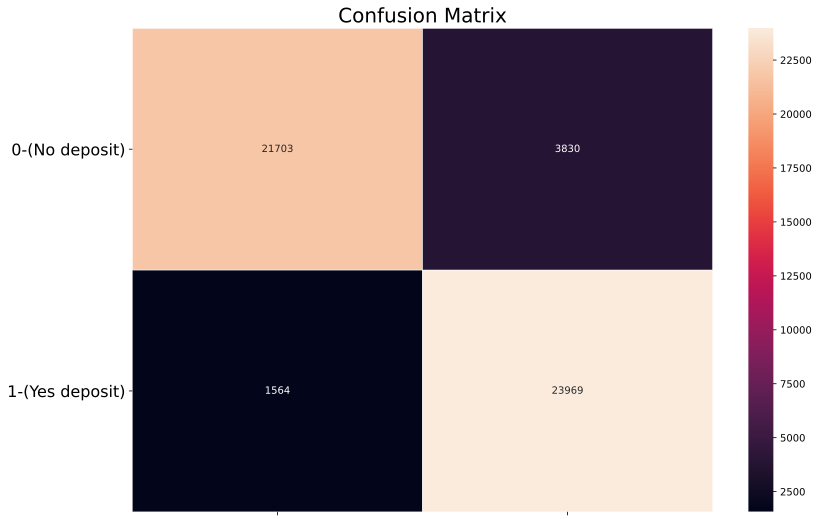

In [80]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['0-(No deposit)', '1-(Yes deposit)'], fontsize=16, rotation=360)
plt.show()



In [56]:


# Let's find the scores  for precision and recall.

# The model is 86% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))



Precision Score:  0.8622302158273382
Recall Score:  0.9387851016331806


Recall: Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

Precision: Means how sure is the prediction of our model that the actual label is a "Yes".


    Precision/Specificity: how many selected instances are relevant.
    Recall/Sensitivity: how many relevant instances are selected.
    F1 score: harmonic mean of precision and recall.
    MCC: correlation coefficient between the observed and predicted binary classifications.
    AUC: relation between true-positive rate and false positive rate. 

Further I would have evaluated the precision-recall tradeoff and ROC as implemented [here](https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit/notebook#Which-Features-Influence-the-Result-of-a-Term-Deposit-Suscription?).

Then I could have gone back to the gradient boosting (my best model) and experiment on which method to deal with class imbalance works best.

Sources to attribute some of the functions to (in model and evaluation section)

* https://www.kaggle.com/janiobachmann/bank-marketing-dataset/code?datasetId=4471&sortBy=voteCount
* https://towardsdatascience.com/practical-code-implementations-of-feature-engineering-for-machine-learning-with-python-f13b953d4bcd
* https://www.kaggle.com/goldens/classification-review-with-python
* https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit#What-is-a-Term-Deposit?
* https://trainindata.medium.com/feature-engineering-for-machine-learning-a-comprehensive-overview-a7ad04c896f8

```{python}

# With more time I could then buld the last part of the script as 

logger.info(f"Training shape: {train_set.shape}")
logger.info(f"Test shape: {test_set.shape}")

# fit model
model_pipeline.fit(X_train, y_train)

# persist trained model
# evaluate the model:
# ====================

# make predictions for train set
logger.info('Predict using training data')
pred_train = model_pipeline.predict(X_train)

# determine mse, rmse and r2
logger.info('train mse: {}'.format(int(mean_squared_error(y_train, pred_train))))
logger.info('train rmse: {}'.format(int(mean_squared_error(y_train, pred_train, squared=False))))
logger.info('train r2: {}'.format(r2_score(y_train, pred_train)))

# make predictions for train set
logger.info('Predict using test data')
pred = model_pipeline.predict(X_test)

# determine mse, rmse and r2
logger.info('train mse: {}'.format(int(mean_squared_error(y_test, pred))))
logger.info('train rmse: {}'.format(int(mean_squared_error(y_test, pred, squared=False))))
logger.info('train r2: {}'.format(r2_score(y_test, pred)))
```